> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I want to perfom an analysis on relationships some variables might have with others and visualize how some variables have affected others over the years.

The size of the Dataset is (10866, 21). This means that we have 10866 movies and 21 columns.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
1. Which year produced more movies
2. Which genre has made more movies?
3. What are the top 5 Directors to make more movies than others?
4. Is there any relationship between Profit and the Popularity of the movie?
5. Which movies have The movie with the Highest and Lowest Profit?
6. Question 6 Which movies have The movie with the Highest and Lowest Revenue?
7. Which are the top 10 movies that have The movie with the Highest Revenue?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [33]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
#size of our data-set
df.shape

(10866, 21)

Our Dataset has 10866 moves and 21 columns before cleaning

In [4]:
#let's take a look at oour columns and the data they contain.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Before cleaning our Data we can see How many columns we have and their data types. So far we don't need to change any datatype.

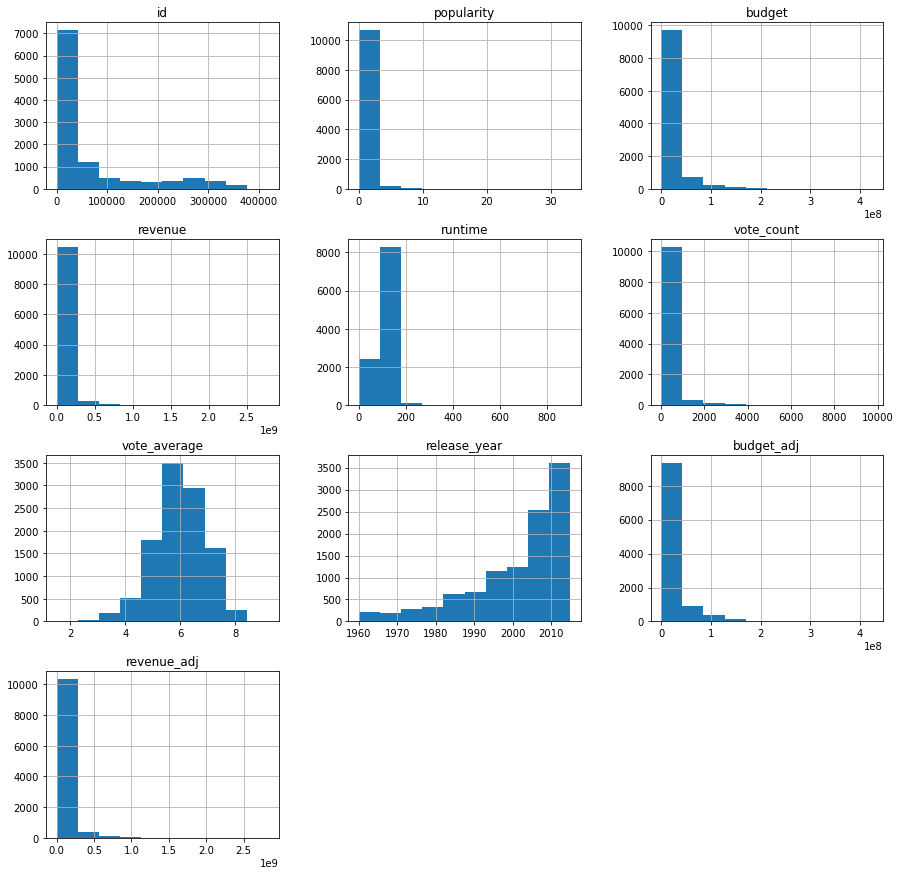

In [5]:
#Let's check the distribution of some Elements.
df.hist(figsize=(15,15));

In [6]:
#checking null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are so many missing values especially in 'homepage, tagline, keywords and production_companies'

In [7]:
#dropping columns I won't be using
df.drop(['imdb_id','cast','homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date','vote_count','vote_average', 'budget_adj', 'revenue_adj'], axis = 1, inplace=True)

Removing the columns I don't need left me with only genres and director to clean so we won't lose much data

In [8]:
#I am dropping the rows with null to get clean data.
df.dropna(inplace=True)

Dropping the null values was the best way I found to get most accurate results in my analysis

In [9]:
#cheacking if our data is clean
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_year            0
dtype: int64

We can see that Our Data set has no null values.

In [10]:
#We have to check if we have duplicated data in order to have clean data
df.duplicated().sum()

1

In [11]:
#dropping duplicates.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
#size of our dataset after cleaning
df.shape

(9806, 9)

After cleaning our Dataset we remain with 9806 rows and 9 columns

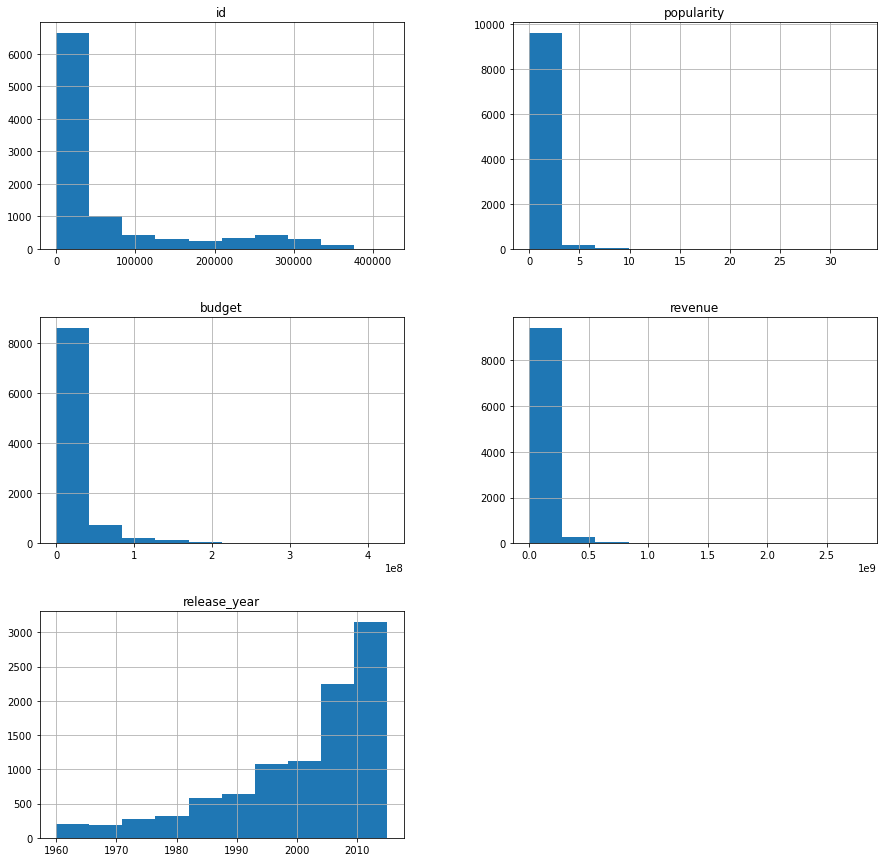

In [13]:
df.hist(figsize=(15,15));

The distibution of data of some elements after cleaning

In [14]:
# getting descriptive informations from our dataset.
df.describe()

,id,popularity,budget,revenue,release_year
count,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9806.000000
mean,63287.653783,0.693143,1.612525e+07,4.407785e+07,2000.890271
std,90808.473021,1.035525,3.216819e+07,1.224038e+08,13.032372
min,5.000000,0.000188,0.000000e+00,0.000000e+00,1960.000000
25%,10247.500000,0.231581,0.000000e+00,0.000000e+00,1994.000000
50%,18725.500000,0.418756,1.403930e+05,0.000000e+00,2005.000000
75%,70586.750000,0.774231,1.900000e+07,3.064621e+07,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 Which year produced more movies

In [15]:
#to find movies released each year i used groupby and count functions
movies_per_year=df.groupby('release_year').count()['id']

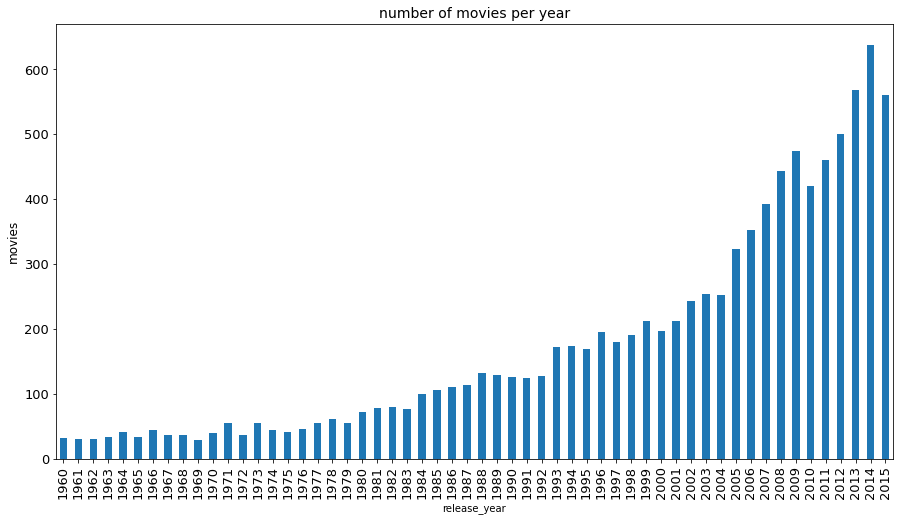

In [16]:
#designing the plot
plt.title('number of movies per year',fontsize = 14)
plt.ylabel('movies',fontsize = 12)
movies_per_year.plot(kind='bar',fontsize = 13,figsize=(15,8));


##### This plot shows us that the year that produced more movies is 2014 with 635 movies

### Research Question 2   Which genre has made more movies?

In [17]:
#splitting the genres into an array
df_genres = df['genres'].str.split('|')

In [18]:
#to transform each element like to a row we used explode function
df_genres_rows = df_genres.explode()
#I had to Verify the output
df_genres_rows

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 24712, dtype: object

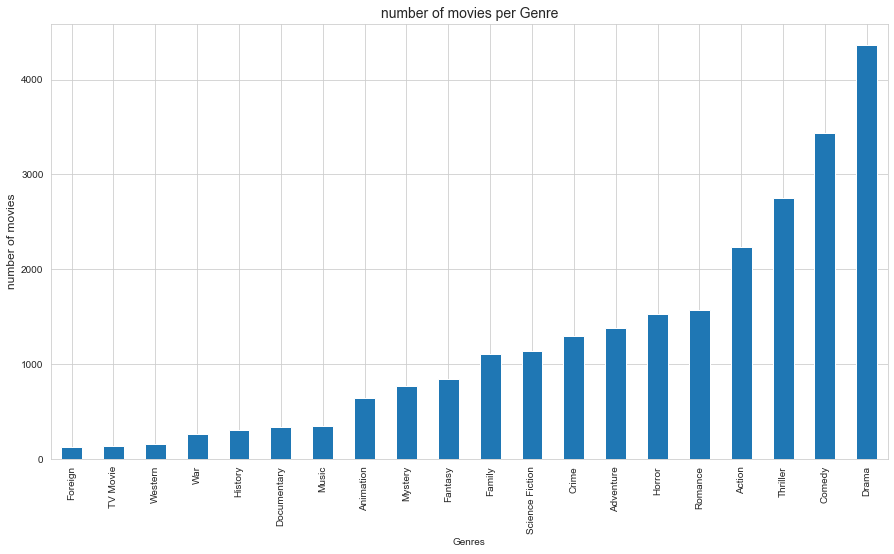

In [19]:
#designing the plot
sns.set_style('whitegrid')
plt.title('number of movies per Genre',fontsize = 14)
plt.ylabel('number of movies',fontsize = 12)
plt.xlabel('Genres')
df_genres_rows.value_counts(ascending=True).plot(kind='bar', figsize=(15,8));

##### This shows The genre that has more movies. Drama is the most made genre followed by Comedy.

### Research Question 3  What are the top 5 Directors to make more movies than others?


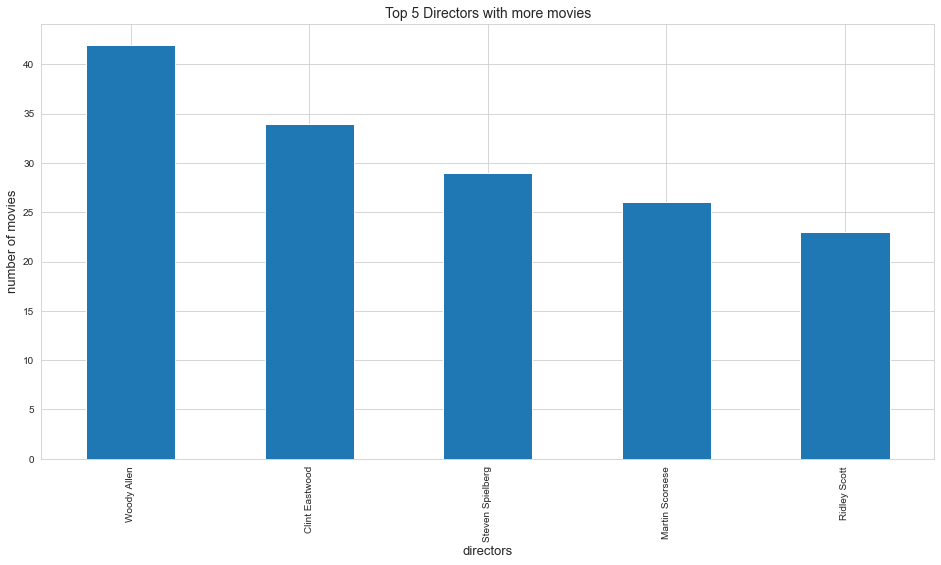

In [20]:
#designing the plot
plt.title('Top 5 Directors with more movies',fontsize = 14)
plt.ylabel('number of movies',fontsize = 13)
plt.xlabel('directors', fontsize = 13)
#we calculate the frequency of the directors
df['director'].value_counts(dropna=False).head().plot(kind='bar', figsize=(16,8));
sns.set_style("whitegrid")

##### This Plot shows us that Woody Allen makes more movies than other Directors


### Research Question 4  Is there any relationship between Profit and the Popularity of the movie?


Text(0, 0.5, 'profit')

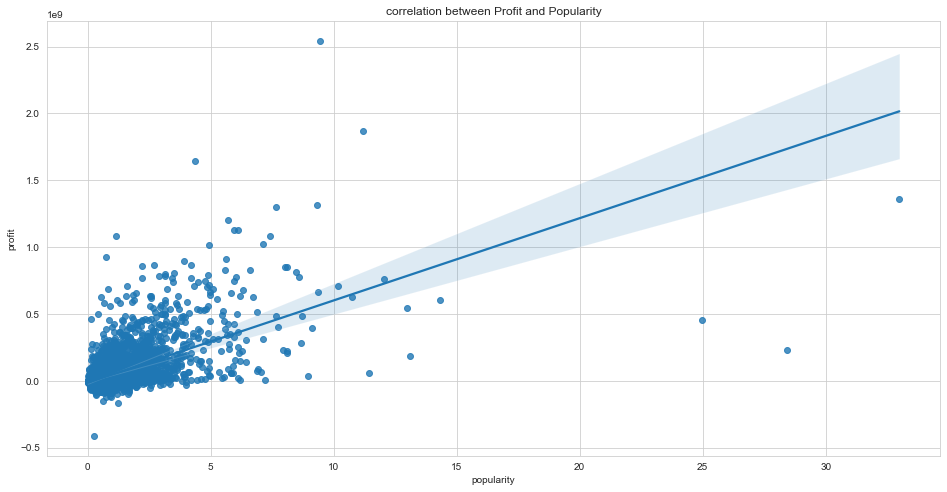

In [21]:
#we have to find the profit of every movie first and save it n yaxis variable
df['profit'] = df['revenue'] - df['budget']

#design the scatter plot
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
plt.title('correlation between Profit and Popularity')
#I used regplot to find correlation between profit and popularity
sns.regplot(x=df['popularity'],y=df['profit']);
plt.xlabel('popularity')
plt.ylabel('profit')

##### The correlation is positive so the answer is yes. The popularity tends to make movies earn high profit


### Research Question 5 Which movies have The movie with the Highest and Lowest Profit?


In [22]:
#This function helps us to get hold of columns and find the highest and lowest indexes in a column and display the columns dynamically.
def calc_min_max(column):
    #getting the lowest in the column
    min = df[column].idxmin()
    #getting the maximum value in the column
    high = df[column].idxmax()
    highest = pd.DataFrame(df.loc[high,:])
    lowest = pd.DataFrame(df.loc[min,:])
    #printing the results
    print(df['original_title'][high] + ' has the highest ' +  column + ' and ' + df['original_title'][min] + ' has the lowest ' +  column)
    #concanitanting our two columns
    return pd.concat([highest,lowest],axis = 1)

In [23]:
calc_min_max('profit')

Avatar has the highest profit and The Warrior's Way has the lowest profit


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_year,2009,2010
profit,2544505847,-413912431


In [24]:
#verifying that the amout of profit on avatar is the same
df_m = df.query('original_title == "Avatar"')
df_m

,id,popularity,budget,revenue,original_title,director,genres,production_companies,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2544505847


Text(0.5, 0, 'profit')

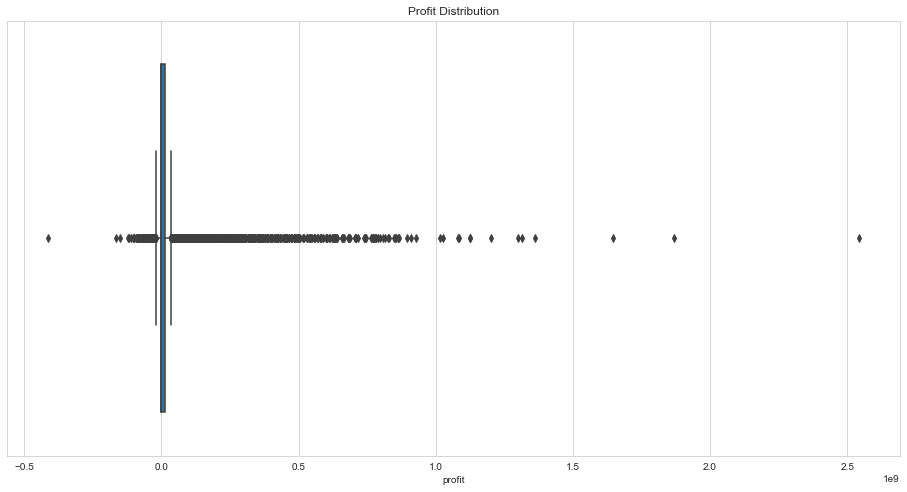

In [25]:
#profit distribution design
plt.figure(figsize=(16,8))
plt.title('Profit Distribution')
sns.boxplot(x = df['profit']);
plt.xlabel('profit')

As we can see on the plot, profit gets unreal to the right which means that more movies profit is less than 1 Billion.

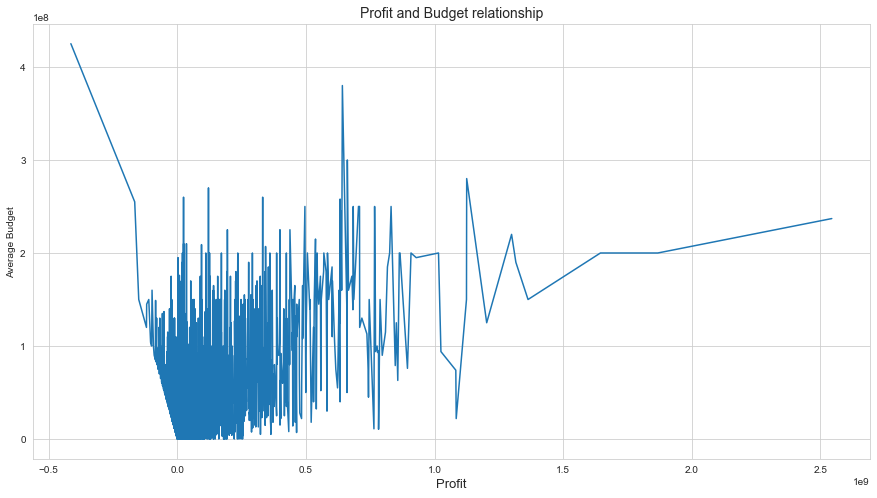

In [26]:
#showing the relationship between Profit and Relationship by using groupby them
profit_budget = df.groupby('profit')['budget'].mean().plot(figsize = (15,8))

#designing the plot
plt.title("Profit and Budget relationship",fontsize = 14)
plt.xlabel('Profit',fontsize = 13)
plt.ylabel('Average Budget')
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

This is plot shows the relationship between The budget(average) and profit. It shows that a movie with a high budget can sometimes generate high profit and sometimes not.

### Research Question 6 Which movies have The movie with the Highest and Lowest Revenue?


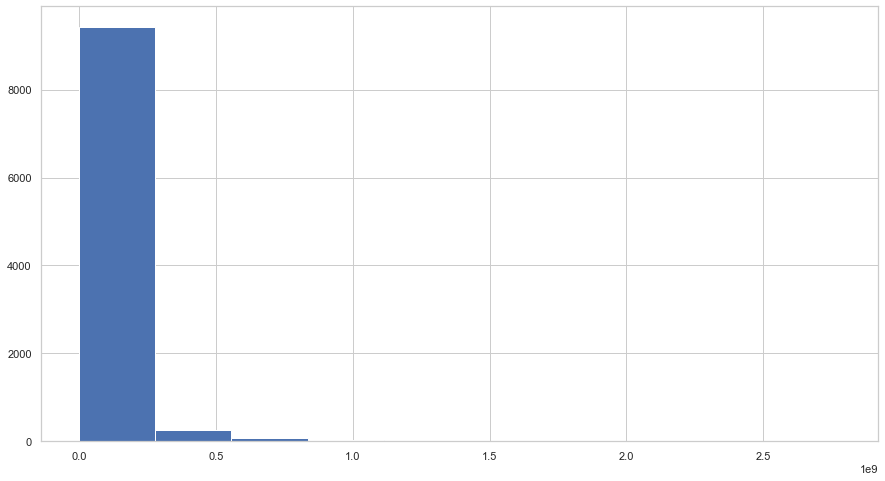

In [27]:
#checking the revenue distribution
df['revenue'].hist();

This hist shows us how the revenue gets strange on the right of the graph

In [28]:
#using the same function to get the revenue
calc_min_max('revenue')

Avatar has the highest revenue and Wild Card has the lowest revenue


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
director,James Cameron,Simon West
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...
release_year,2009,2015
profit,2544505847,-30000000


### Research Question 7 Which are the top 10 movies that have The movie with the Highest Revenue?


Text(0.5, 0, 'revenue')

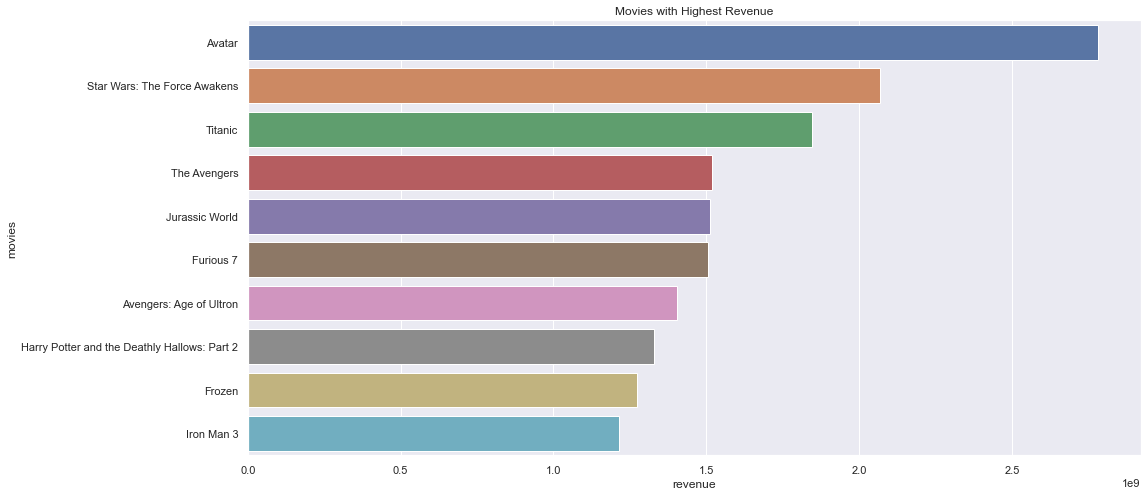

In [29]:
#now lets use loc property to access rows in two different column 'revenue and original_title'
df_revenue = df.loc[:,'revenue': 'original_title']
#displaying the top ten movies with high revenue
revenue = df_revenue.nlargest(10, 'revenue')
#display our plot
sns.set(rc={'figure.figsize':(16,8)})
plt.title('Movies with Highest Revenue')
sns.barplot(x=revenue['revenue'][:10], y=revenue['original_title'][:10]);
plt.ylabel('movies')
plt.xlabel('revenue')

##### As we can see it on the plot, Avatar is the movie with the highest Revenue followed by Star Wars: The Force Awakens and Titanic.

<a id='conclusions'></a>
## Conclusions

1. In my analysis the year 2014 produceed more movies than other years.
2. I found out that Genre Drama has more movies followed by Comedy.
3. The top 5 Directors to make more movies than others are Woody Allen, Clint EastWood, Martin Scorsese, Steven Spielberg and Ridley Scott.
4. The profit tend to be higher when the movie is popular and the plot shows that the correlation is positive.
5. Avatar has the highest profit and The Warrior's Way has the lowest profit.
6. Avatar has the highest revenue and Wild Card has the lowest revenue.
7. Movies with the highest revenue are: Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows, Frozen and Iron Man 3.


## Limitation

There is few limitation with the Dataset provided
-The missing data and It affects the accuracy of results. I couldn't drop the rows because there was a lot of missing data.
-The genres column has more than one genres and It can be confusing.

## Ressources Used

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html,
https://www.w3resource.com/pandas/dataframe/dataframe-explode.php,
https://stackoverflow.com,
https://seaborn.pydata.org/tutorial/categorical.html,
https://morphocode.com/pandas-cheat-sheet/

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/usr/local/lib/python3.9/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 512

1